In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML_Project'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Lab_ML/Lab_10


In [ ]:
#Thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Đọc dữ liệu từ file
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


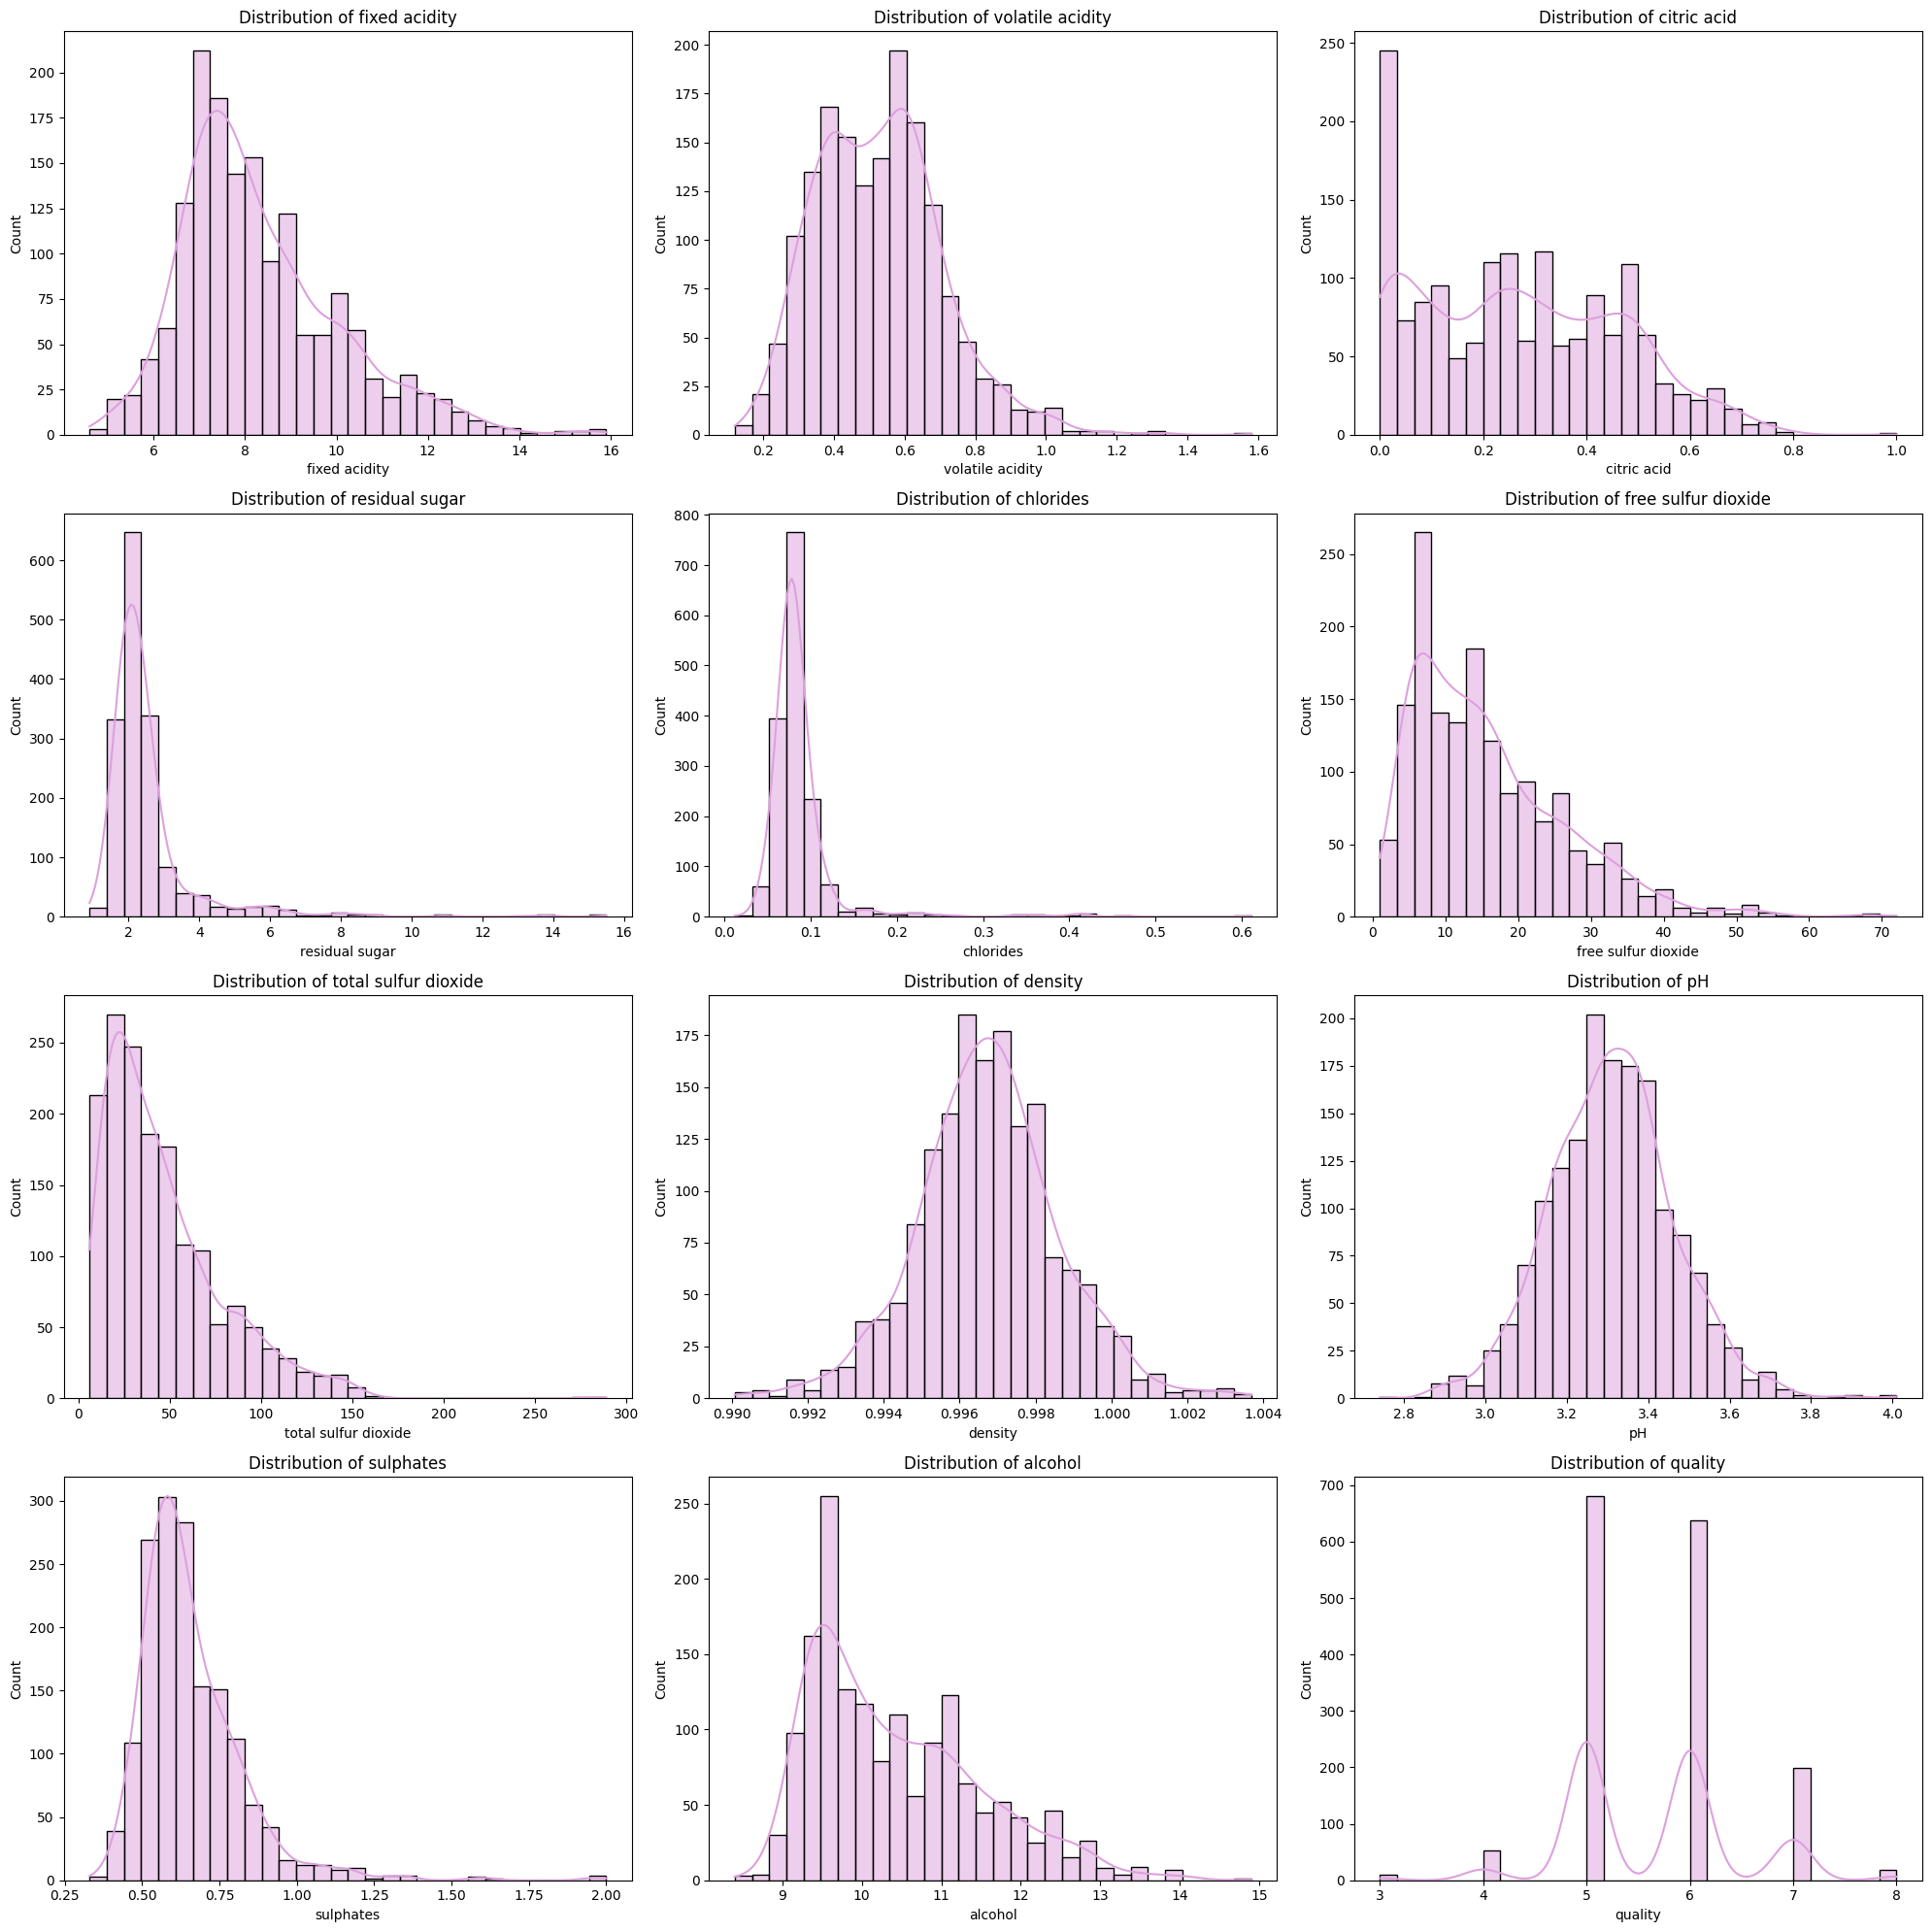

In [ ]:
# Biểu đồ histogram
num_columns = len(data.columns)
num_rows = (num_columns + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data=data, x=column, kde=True, bins=30, color='#DDA0DD', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Ẩn các trục không sử dụng nếu số biểu đồ ít hơn số ô
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Đọc dữ liệu từ file
data = pd.read_csv('winequality-red.csv')

# Chia dữ liệu thành đặc trưng (features) và nhãn (labels)
X = data.drop('quality', axis=1)
y = data['quality']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BUILD AND EVALUATE LOGISTIC REGRESSION MODEL
+-----------+--------------------------+
|           | Kết quả Cross-Validation |
+-----------+--------------------------+
|  Accuracy |          0.575           |
| Precision |    0.5618039598937663    |
|   Recall  |          0.575           |
|  F1 Score |    0.5510842666105824    |
+-----------+--------------------------+


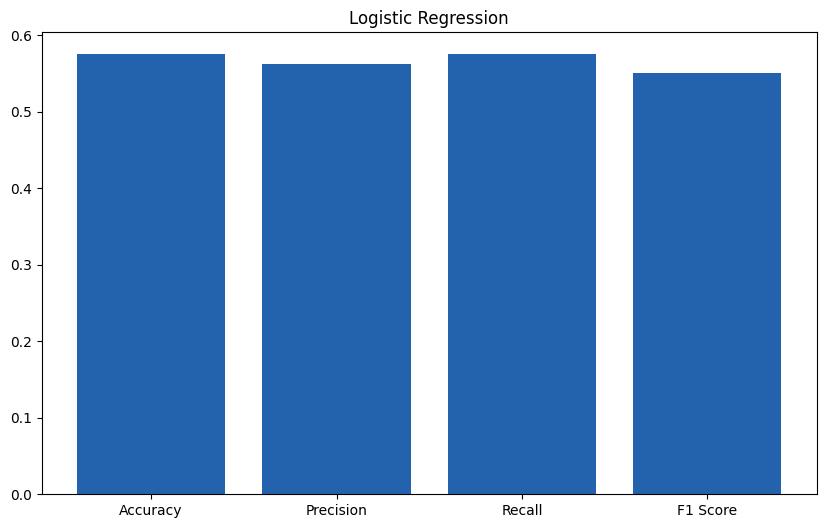

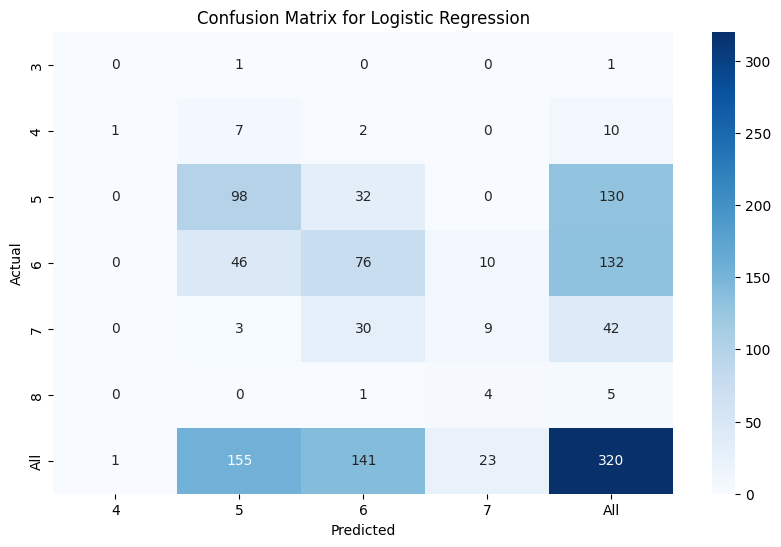

In [ ]:
#Logistic Regression
# Huấn luyện mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

# In ra kết quả
log_reg_results = {'Accuracy': accuracy_log_reg,'Precision': precision_log_reg,'Recall': recall_log_reg,'F1 Score': f1_log_reg}
#Table
table = PrettyTable()
print('BUILD AND EVALUATE LOGISTIC REGRESSION MODEL')
table.field_names = ["", "Kết quả Cross-Validation"]
table.add_row(["Accuracy", accuracy_log_reg])
table.add_row(["Precision", precision_log_reg])
table.add_row(["Recall", recall_log_reg])
table.add_row(["F1 Score", f1_log_reg])
print(table)

# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#2363AE'])
plt.title('Logistic Regression')

conf_matrix = pd.crosstab(y_test, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


BUILD AND EVALUATE DECISION TREE MODEL
+-----------+--------------------------+
|           | Kết quả Cross-Validation |
+-----------+--------------------------+
|  Accuracy |          0.5625          |
| Precision |    0.5533184644915204    |
|   Recall  |          0.5625          |
|  F1 Score |    0.5576319947830436    |
+-----------+--------------------------+


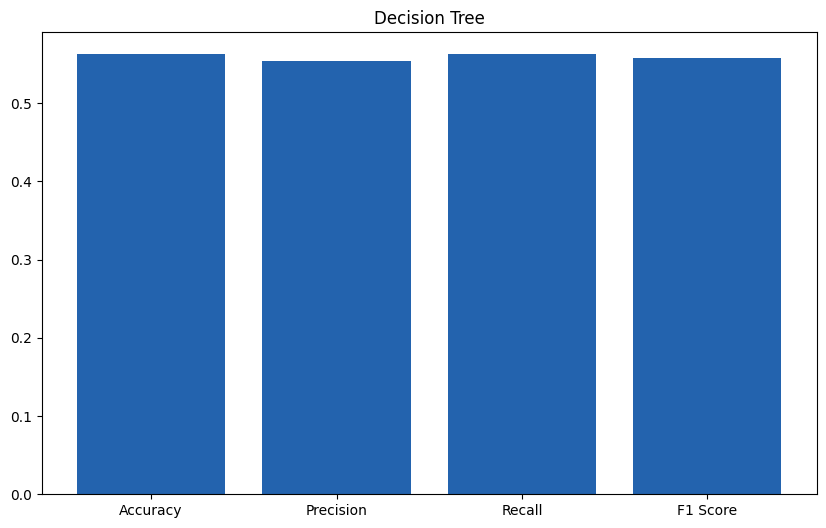

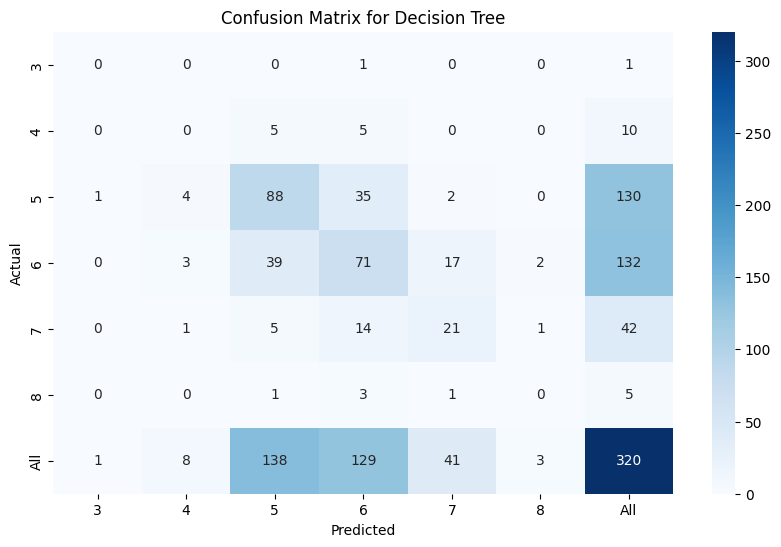

In [ ]:
#Decision Tree
# Huấn luyện mô hình Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_dt = decision_tree.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# In ra kết quả
dt_results = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt
}
#Table
table = PrettyTable()
print('BUILD AND EVALUATE DECISION TREE MODEL')
table.field_names = ["", "Kết quả Cross-Validation"]

table.add_row(["Accuracy", accuracy_dt])
table.add_row(["Precision", precision_dt])
table.add_row(["Recall", recall_dt])
table.add_row(["F1 Score", f1_dt])
print(table)

# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_dt, precision_dt, recall_dt, f1_dt]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#2363AE'])
plt.title('Decision Tree')

conf_matrix = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BUILD AND EVALUATE RANDOM FOREST MODEL
+-----------+--------------------------+
|           | Kết quả Cross-Validation |
+-----------+--------------------------+
|  Accuracy |         0.659375         |
| Precision |    0.630906320861678     |
|   Recall  |         0.659375         |
|  F1 Score |    0.6437864795480438    |
+-----------+--------------------------+


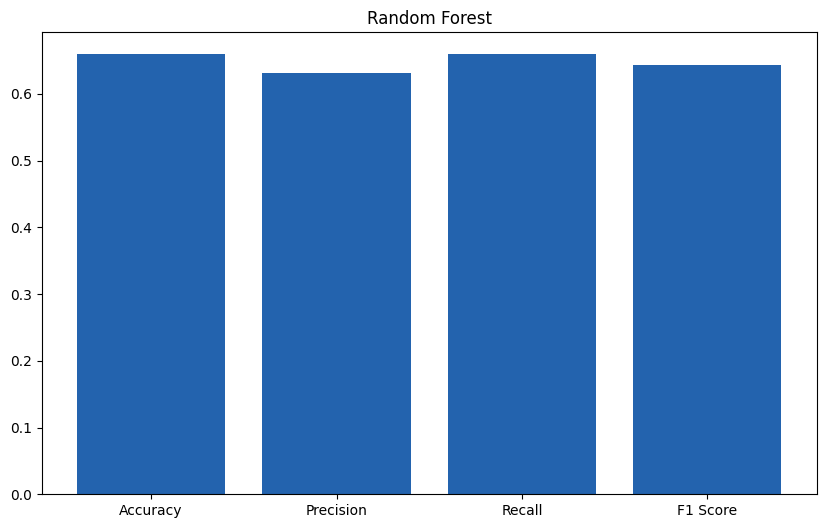

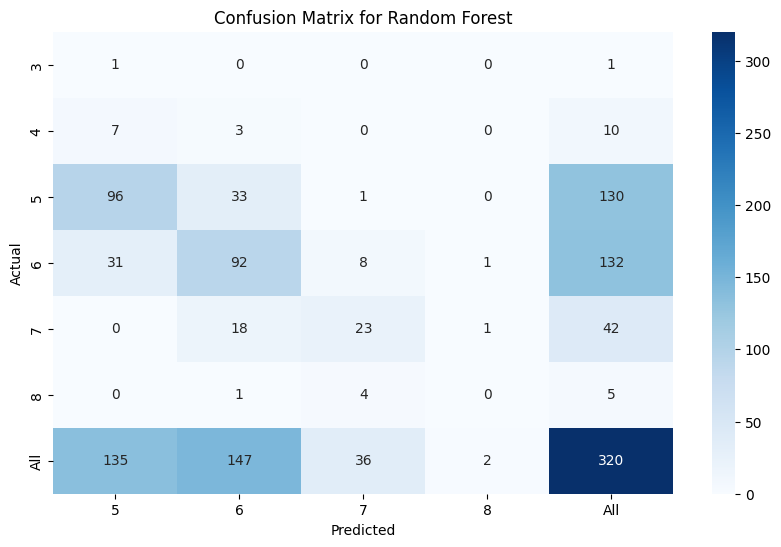

In [ ]:
#Random Forest
# Huấn luyện mô hình Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_rf = random_forest.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# In ra kết quả
rf_results = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf
}
#Table
table = PrettyTable()
print('BUILD AND EVALUATE RANDOM FOREST MODEL')
table.field_names = ["", "Kết quả Cross-Validation"]

table.add_row(["Accuracy", accuracy_rf])
table.add_row(["Precision", precision_rf])
table.add_row(["Recall", recall_rf])
table.add_row(["F1 Score", f1_rf])
print(table)

# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_rf, precision_rf, recall_rf, f1_rf]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#2363AE'])
plt.title('Random Forest')

conf_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BUILD AND EVALUATE KNN MODEL
+-----------+--------------------------+
|           | Kết quả Cross-Validation |
+-----------+--------------------------+
|  Accuracy |         0.546875         |
| Precision |    0.5223882430488974    |
|   Recall  |         0.546875         |
|  F1 Score |    0.5309047543748682    |
+-----------+--------------------------+


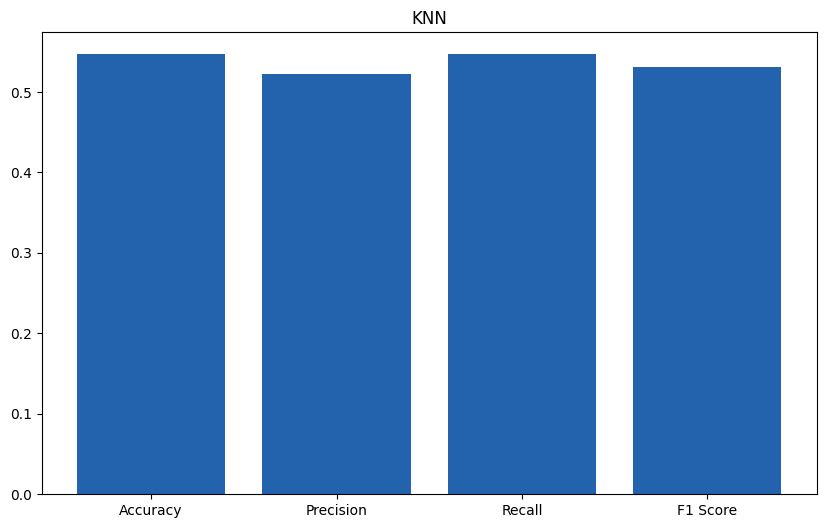

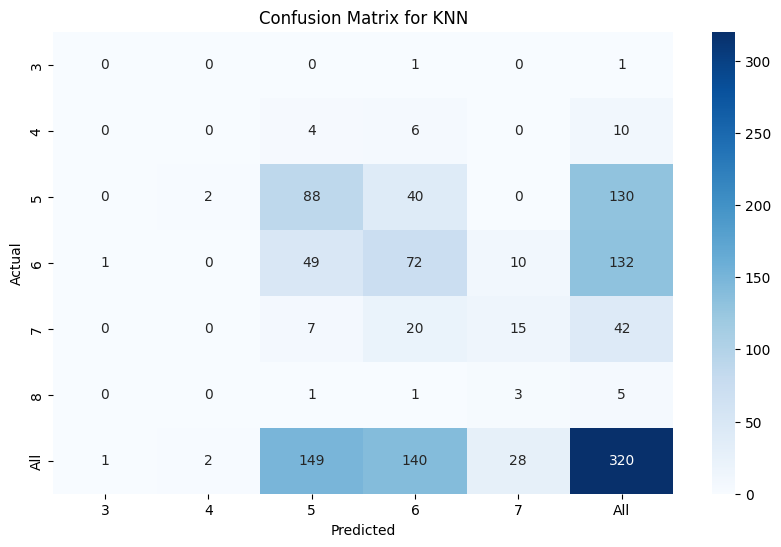

In [ ]:
#K-Nearest Neighbors (KNN)
# Huấn luyện mô hình KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn.predict(X_test_scaled)

# Tính toán các chỉ số đánh giá
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# In ra kết quả
knn_results = {
    'Accuracy': accuracy_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1 Score': f1_knn
}
#Table
table = PrettyTable()
print('BUILD AND EVALUATE KNN MODEL')
table.field_names = ["", "Kết quả Cross-Validation"]

table.add_row(["Accuracy", accuracy_knn])
table.add_row(["Precision", precision_knn])
table.add_row(["Recall", recall_knn])
table.add_row(["F1 Score", f1_knn])
print(table)

# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_knn, precision_knn, recall_knn, f1_knn]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#2363AE'])
plt.title('KNN')

conf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Actual'], colnames=['Predicted'], margins=True)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.show()


Epoch 1/70
36/36 [==============================] - 1s 13ms/step - loss: 1.4207 - accuracy: 0.4839 - val_loss: 1.2132 - val_accuracy: 0.5547
Epoch 2/70
36/36 [==============================] - 0s 6ms/step - loss: 1.0869 - accuracy: 0.5795 - val_loss: 1.0797 - val_accuracy: 0.6016
Epoch 3/70
36/36 [==============================] - 0s 5ms/step - loss: 0.9885 - accuracy: 0.5969 - val_loss: 1.0194 - val_accuracy: 0.6172
Epoch 4/70
36/36 [==============================] - 0s 4ms/step - loss: 0.9534 - accuracy: 0.6203 - val_loss: 0.9892 - val_accuracy: 0.6328
Epoch 5/70
36/36 [==============================] - 0s 5ms/step - loss: 0.9300 - accuracy: 0.6212 - val_loss: 0.9926 - val_accuracy: 0.6250
Epoch 6/70
36/36 [==============================] - 0s 5ms/step - loss: 0.9081 - accuracy: 0.6281 - val_loss: 0.9690 - val_accuracy: 0.6250
Epoch 7/70
36/36 [==============================] - 0s 6ms/step - loss: 0.8952 - accuracy: 0.6342 - val_loss: 0.9501 - val_accuracy: 0.6172
Epoch 8/70
36/36 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


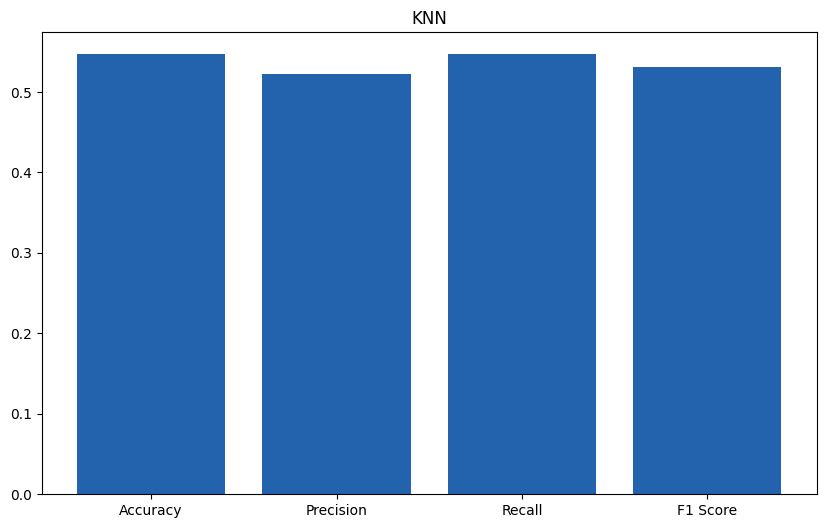

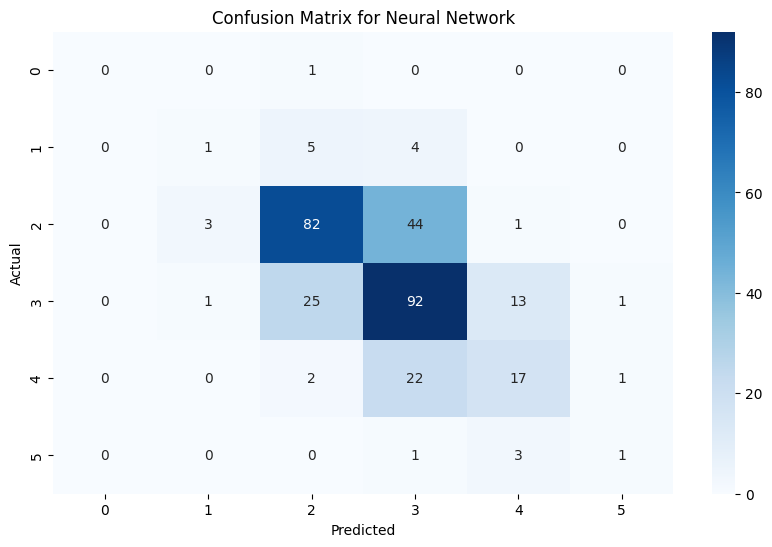

In [ ]:
#Neural Network
def adjust_labels(labels):
    return labels - 3

adjusted_labels_train = adjust_labels(y_train)
adjusted_labels_test = adjust_labels(y_test)

# One-hot encoding cho nhãn
num_classes = 6
one_hot_labels_train = keras.utils.to_categorical(adjusted_labels_train, num_classes=num_classes)

# Xây dựng mô hình Neural Network
model_ANN = keras.Sequential([
    keras.layers.Dense(128, input_shape=(11,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Biên dịch mô hình
model_ANN.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Huấn luyện mô hình
history = model_ANN.fit(X_train_scaled, one_hot_labels_train, epochs=70, validation_split=0.1, verbose=1)

# Dự đoán trên tập kiểm tra
y_pred_prob = model_ANN.predict(X_test_scaled)
y_pred_ann = np.argmax(y_pred_prob, axis=1)
labels_test_integers = adjusted_labels_test

# Tính toán các chỉ số đánh giá
accuracy_ann = accuracy_score(labels_test_integers, y_pred_ann)
precision_ann = precision_score(labels_test_integers, y_pred_ann, average='weighted')
recall_ann = recall_score(labels_test_integers, y_pred_ann, average='weighted')
f1_ann = f1_score(labels_test_integers, y_pred_ann, average='weighted')

# In ra kết quả
ann_results = {
    'Accuracy': accuracy_ann,
    'Precision': precision_ann,
    'Recall': recall_ann,
    'F1 Score': f1_ann
}
#Table
table = PrettyTable()
print('BUILD AND EVALUATE NEURAL NETWORK MODEL')
table.field_names = ["", "Kết quả Cross-Validation"]
table.add_row(["Accuracy", accuracy_ann])
table.add_row(["Precision", precision_ann])
table.add_row(["Recall", recall_ann])
table.add_row(["F1 Score", f1_ann])
print(table)

# Vẽ biểu đồ
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_knn, precision_knn, recall_knn, f1_knn]
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#2363AE'])
plt.title('KNN')

conf_matrix = confusion_matrix(labels_test_integers, y_pred_ann)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(0, num_classes), yticklabels=range(0, num_classes))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network')
plt.show()


In [ ]:
# Dữ liệu đánh giá
results = {
    'Logistic Regression': {
        'Accuracy': accuracy_log_reg,
        'Precision': precision_log_reg,
        'Recall': recall_log_reg,
        'F1 Score': f1_log_reg,
    },
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Precision': precision_dt,
        'Recall': recall_dt,
        'F1 Score': f1_dt,
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1 Score': f1_rf,
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Precision': precision_knn,
        'Recall': recall_knn,
        'F1 Score': f1_knn,
    },
    'Neural Network': {
        'Accuracy': accuracy_ann,
        'Precision': precision_ann,
        'Recall': recall_ann,
        'F1 Score': f1_ann,
    }
}

# Tạo danh sách các thuật toán
algorithms = list(results.keys())

<ipython-input-75-43481b65bd4b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
<ipython-input-75-43481b65bd4b>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
<ipython-input-75-43481b65bd4b>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(algorithms, rotation=45, ha='right')
<ipython-input-75-43481b65bd4b>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(algorithms, rotation=45, ha='right')


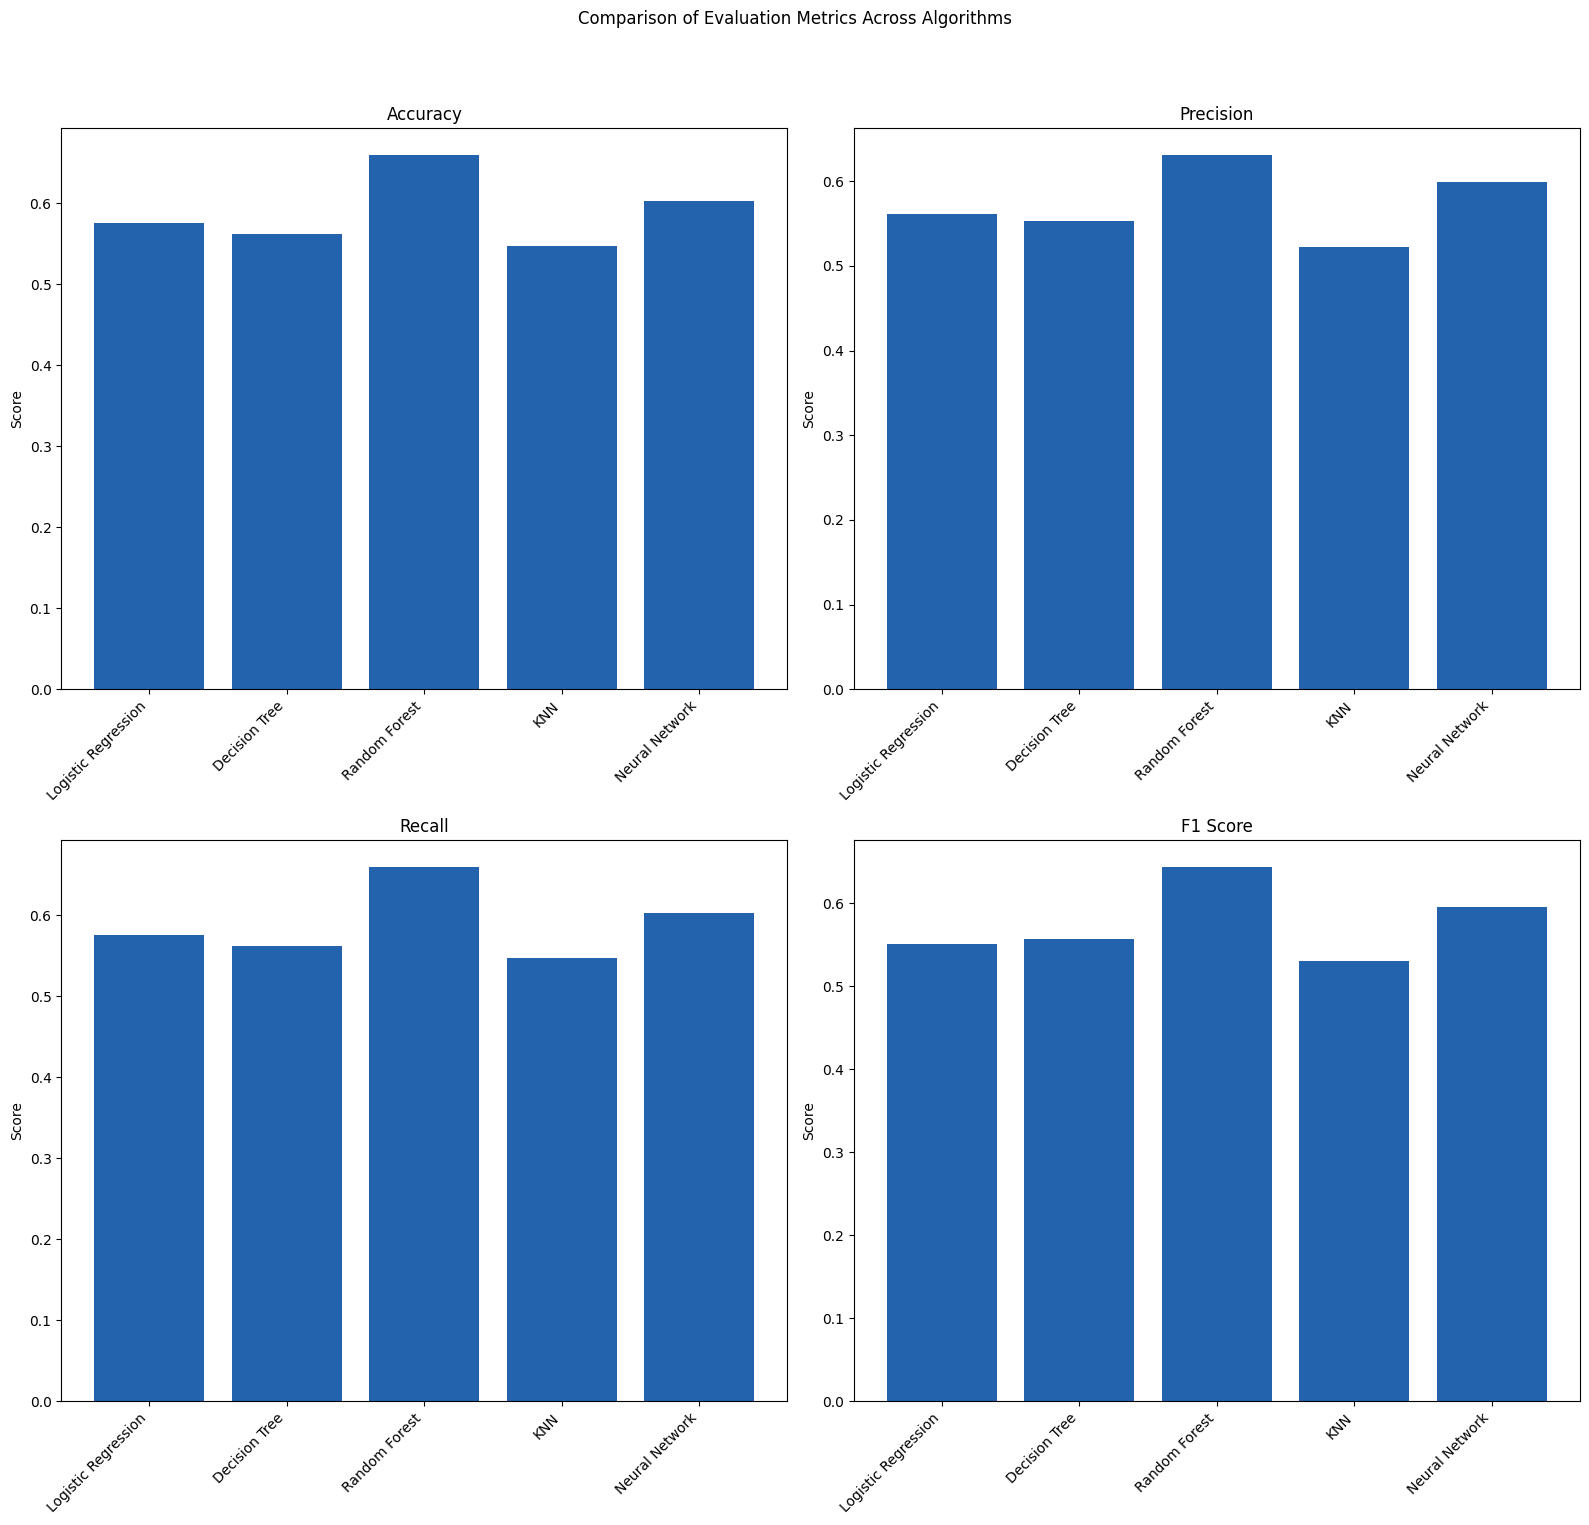

In [ ]:
# Thiết lập kích thước biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.suptitle('Comparison of Evaluation Metrics Across Algorithms')

# Vẽ biểu đồ Accuracy
ax = axs[0, 0]
values = [results[algo]['Accuracy'] for algo in algorithms]
ax.bar(algorithms, values, color='#2363AE')
ax.set_title('Accuracy')
ax.set_ylabel('Score')
ax.set_xticklabels(algorithms, rotation=45, ha='right')

# Vẽ biểu đồ Precision
ax = axs[0, 1]
values = [results[algo]['Precision'] for algo in algorithms]
ax.bar(algorithms, values, color='#2363AE')
ax.set_title('Precision')
ax.set_ylabel('Score')
ax.set_xticklabels(algorithms, rotation=45, ha='right')

# Vẽ biểu đồ Recall
ax = axs[1, 0]
values = [results[algo]['Recall'] for algo in algorithms]
ax.bar(algorithms, values, color='#2363AE')
ax.set_title('Recall')
ax.set_ylabel('Score')
ax.set_xticklabels(algorithms, rotation=45, ha='right')

# Vẽ biểu đồ F1 Score
ax = axs[1, 1]
values = [results[algo]['F1 Score'] for algo in algorithms]
ax.bar(algorithms, values, color='#2363AE')
ax.set_title('F1 Score')
ax.set_ylabel('Score')
ax.set_xticklabels(algorithms, rotation=45, ha='right')

# Tinh chỉnh bố cục
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Hiển thị biểu đồ
plt.show()
